Basics of Machine Learning
===

**Overview of the notebook:**
    - Perceptrons
    - Regression
    - Classification
    - Cross-Validation
    - Visualze Performance
  

**Perceptrons**


The very basic beginning of machine learning algorithms was founded by Frank Rosenbaum in the 1950s. He set up a visual/mechanical hardware that was able to separate pictures of...

Rosenbaum trained the machine using example datasets (pictures) and offering the right decisions to each datapoint. Than letting the automate decide about unseen datasets to measure the performance....

The very basic rule to decide was the zero-one loss ....

A very common function to map a random real number to the classes [0,1] is the sigmoid-function:

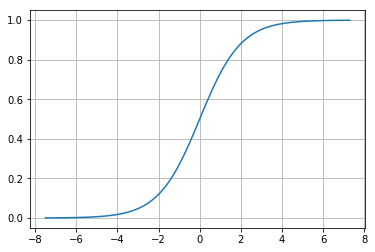

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x=np.arange(-7.5,7.5,0.2)
#print(x)
y=1/(1+np.exp(-x))

plt.plot(x,y)
plt.grid()

The sigmiod is defined as the $y(x) = \frac{1}{1+e^{-x}}$

It enabales a the setup of a decision rule like $ y(x) < 0.5 \Rightarrow $ 0 and 
 $ y(x) \ge 0.5 \Rightarrow $ 1.
 
The follwing little function calculates the results of the sigmoid for every real number. 

In [4]:
import math
def sigmoid(a):
    b=1/(1+math.exp(-a) )
    return b

A value of $0$ will result in a sigmoid(0)=0.5

In [5]:
print(sigmoid(0))

0.5


Any positive number will result in a sigmoid of greater 0.5

In [6]:
print(sigmoid(0.2))

0.549833997312478


and any negative number will result in a sigmoid of lower than 0.5

In [7]:
print(sigmoid(-0.2))

0.45016600268752216


The greater or smaller the numbers are the more clear the output of the sigmoid will converge to 1 or to 0


In [8]:
print(sigmoid(20))
print(sigmoid(-20))

0.9999999979388463
2.0611536181902037e-09


So the sigmoid enables a decision finding interpreted as a probability number between 0 and 1 and a classification rule of lower or higher than 50%

**Regression**

In the case of regression the model tries to predict a floating point value of a continous variable. Regression is a tool to **deduct** from a sampled dataset to the general **circumstances** in the whole data. In other words I want to know which value I can expect at the positions where I wasn't able to measure a datapoint. 

Calculation models used in this case provide often exact mathematical solution without any optimizational help.

**Classification**

In the case of classification the model tries to predict a nominal value, a class number a true/false decision or category in a taxometric system. 

Calculation model used in this case are often not able to find local/global minima by direct or exact mathematical aproaches and need the help of optimization techniques like gradient decent, stochastic gradient decent or others. Classifictions are more computationally expensiv than regression models.

**Logistic Regression**

Despite the name Logistic regression is a classification method. It was first introduced and named in statistics and later on used in an other context by the machine learning community. 

In [9]:
xa=np.zeros((4,1))
print(xa)
xa[0,0]= 1
xa[1,0]= 0.2
xa[2,0]= 0.5
xa[3,0]= 0.91
print(xa)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1.  ]
 [ 0.2 ]
 [ 0.5 ]
 [ 0.91]]


In [10]:
xb=np.zeros((4,1))
print(xb)
xb[0,0]= 1
xb[1,0]= 0.4
xb[2,0]= 0.01
xb[3,0]= 0.5

print(xb)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1.  ]
 [ 0.4 ]
 [ 0.01]
 [ 0.5 ]]


In [11]:
xc=np.zeros((4,1))
print(xc)
xc[0,0]= 1
xc[1,0]= 0.3
xc[2,0]= 1.1
xc[3,0]= 0.8
print(xc)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1. ]
 [ 0.3]
 [ 1.1]
 [ 0.8]]


In [12]:
w=np.zeros((4,1))
print(w)
w[0,0]= 0.66
w[1,0]= 0.1
w[2,0]= 0.35
w[3,0]= 0.7
print(w)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 0.66]
 [ 0.1 ]
 [ 0.35]
 [ 0.7 ]]


In [13]:
sigmoid(np.dot(xa.T,w))

0.8163782718851771

but the label was "1"

In [14]:
sigmoid(np.dot(xb.T,w))

0.7414464286583212

but the label was "0"

In [15]:
sigmoid(np.dot(xc.T,w))

0.8368534378594309

but the label was "0"

If we calculate the sum of the squared error by 

$\frac{1}{2}[ (1 - 0.8163 )^2  + (0 - 0.7414)^2 +  (0 - 0.8368 )^2 ]$

we get a quite bad result:

In [16]:
1/2* ((1 - 0.8163 )**2  + (0 - 0.7414)**2 +  (0 - 0.8368 )**2)

0.6418269449999999

**==============================**

Now update the weights vector $\vec w$ e.g. to

In [17]:
w=np.zeros((4,1))
print(w)
w[0,0]= 0.25
w[1,0]= 0.1
w[2,0]= 0.36
w[3,0]= 0.3
print(w)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 0.25]
 [ 0.1 ]
 [ 0.36]
 [ 0.3 ]]


In [18]:
import numpy as np
def np_sigmoid(a):
    b=1/(1+np.exp(-a) )
    return b

In [19]:
sigmoid(np.dot(xa.T,w))

0.673267295119654

In [20]:
sigmoid(np.dot(xb.T,w))

0.6091165035715496

In [21]:
sigmoid(np.dot(xc.T,w))

0.7142263775539306

and recalculate the squared error:

In [22]:
1/2* ((1 - 0.6732 )**2  + (0 - 0.6091)**2 +  (0 - 0.7142 )**2)

0.4939413449999999

In [23]:
x=np.concatenate((xa,xb,xc),axis=1)
print(x)

[[ 1.    1.    1.  ]
 [ 0.2   0.4   0.3 ]
 [ 0.5   0.01  1.1 ]
 [ 0.91  0.5   0.8 ]]


In [24]:
print(np.dot(x.T,w))

[[ 0.723 ]
 [ 0.4436]
 [ 0.916 ]]


In [25]:
print(np_sigmoid(np.dot(x.T,w)))

[[ 0.6732673 ]
 [ 0.6091165 ]
 [ 0.71422638]]


**Cross-Validation**


Cross-validation is a technique to estimate the goodness-of-fit of a model to the given data or in other words how good the model will generalize on an independent dataset. It is mainly used in settings were the accuracy of a predictive model has to be estimated. Therefore the dataset is divided into k random subsets for k experiments using each time k-1 subsets to train k models which are tested on the respectively remaining subset. Figure 11 shows this approach for k=5 subsets/experiments. The testing errors are averaged which provides an estimate on how good the model generalizes on the whole dataset. This technique is called k-Fold cross-validation.


**ROC Cuves and Tuckey Box plots**

In case of unbalanced classes, e.g. only few positive and a lot of negative data-points the classification accuracy is an insuffi- cient performance measure as a classifier that would predict the negative class for the whole dataset would earn a very high accu- racy without any correct prediction of the positive class. Receiver Operator Characteristics (ROC- curves) serve as basis for an in- dependent measure of performance (ROCAUC) which is widely used for such cases in machine learning. The ROC-curve shows a diagram with the false-positive rate ( P(FP), specificity or FPR, horizontal axis) vs. the true-positive rate ( P(TP), sensitivity or TPR, vertical axis) of a classifier. Both relative frequencies speci- ficity & sensitivity are evaluated at any cutpoint between the two class distributions and displayed in a diagram which represents the trade-off between them. (cf. figure 13) For practical usage a two-digit number of cutpoints is sufficient to approximate the ROC-curve. The interpretation of the curve is easy comprehensi- ble if for example the discrimination of the used classifier is very good the false-positive rate is very low while the true-positive rate is relative high. This results in a very steep curve which also means that the area under the curve is high